### Importing Libraries

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.preprocessing import StandardScaler

In [2]:
#fetching data from API key
url ="https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&outputsize=full&apikey=PAFTB5LA6Y93BLPZ"
r = requests.get(url)
data = r.json()

# Extracting the time series data
# The key for daily data is 'Time Series (Daily)' not 'Time Series (5min)'
time_series_key = 'Time Series (Daily)'
time_series_data = data[time_series_key]

In [3]:
# Converting the time series data into a DataFrame
df = pd.DataFrame.from_dict(time_series_data, orient='index')

# Renaming the columns for better understanding
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

In [4]:
# Converting the index to datetime
df.index = pd.to_datetime(df.index)

# Convert the data types from string to float for numerical calculations
df = df.astype(float)

# Display the DataFrame
print(df.head())

              Open      High       Low   Close     Volume
2024-11-19  206.50  210.3300  206.1900  210.25  2860746.0
2024-11-18  207.00  208.4150  205.3701  208.09  3406045.0
2024-11-15  207.46  208.4900  204.0700  204.99  3986460.0
2024-11-14  210.00  210.4999  206.3500  208.99  6372853.0
2024-11-13  209.50  211.4100  209.0701  210.92  3247830.0


In [5]:
df.shape

(6304, 5)

In [6]:
df.describe(include='all')

,Open,High,Low,Close,Volume
count,6304.000000,6304.000000,6304.000000,6304.000000,6.304000e+03
mean,131.942635,133.132637,130.830856,132.005088,5.894691e+06
std,36.577422,36.653253,36.505323,36.595067,3.297745e+06
min,54.650000,56.700000,54.010000,55.070000,1.928430e+05
25%,101.500000,103.170000,100.022500,101.822500,3.732422e+06
50%,129.015000,129.975000,127.945000,129.050000,5.049797e+06
75%,156.755000,158.095000,155.405000,156.712500,7.091250e+06
max,236.400000,237.370000,233.170000,235.260000,4.120730e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6304 entries, 2024-11-19 to 1999-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6304 non-null   float64
 1   High    6304 non-null   float64
 2   Low     6304 non-null   float64
 3   Close   6304 non-null   float64
 4   Volume  6304 non-null   float64
dtypes: float64(5)
memory usage: 295.5 KB


### Data Cleaning

In [8]:
#checking missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [9]:
#Checking for duplicate values
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


In [10]:
# Checking for outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

In [11]:
# Identify outliers for numerical columns
outliers = {}
for column in ['Open', 'High', 'Low', 'Close', 'Volume']:
    outliers[column] = df[detect_outliers_iqr(df[column])]

In [12]:
# Displaying outliers
for column, outlier_rows in outliers.items():
    if not outlier_rows.empty:
        print(f"\nOutliers in column '{column}':")
        print(outlier_rows)


Outliers in column 'Volume':
              Open    High     Low   Close      Volume
2024-04-25  168.20  172.45  165.66  168.91  16702150.0
2024-01-25  184.96  196.90  184.83  190.43  29596239.0
2023-03-17  124.08  124.52  122.93  123.69  37400167.0
2023-01-26  137.53  138.27  132.98  134.45  17548483.0
2022-10-20  126.25  128.96  125.15  128.30  13623115.0
...            ...     ...     ...     ...         ...
1999-11-22  105.50  108.44  104.44  107.87  13681600.0
1999-11-19   99.00  105.12   98.37  103.94  19678400.0
1999-11-18   94.00   98.25   93.56   98.00  18720500.0
1999-11-05   92.75   92.94   90.19   90.25  13737600.0
1999-11-04   94.44   94.44   90.00   91.56  16697600.0

[305 rows x 5 columns]


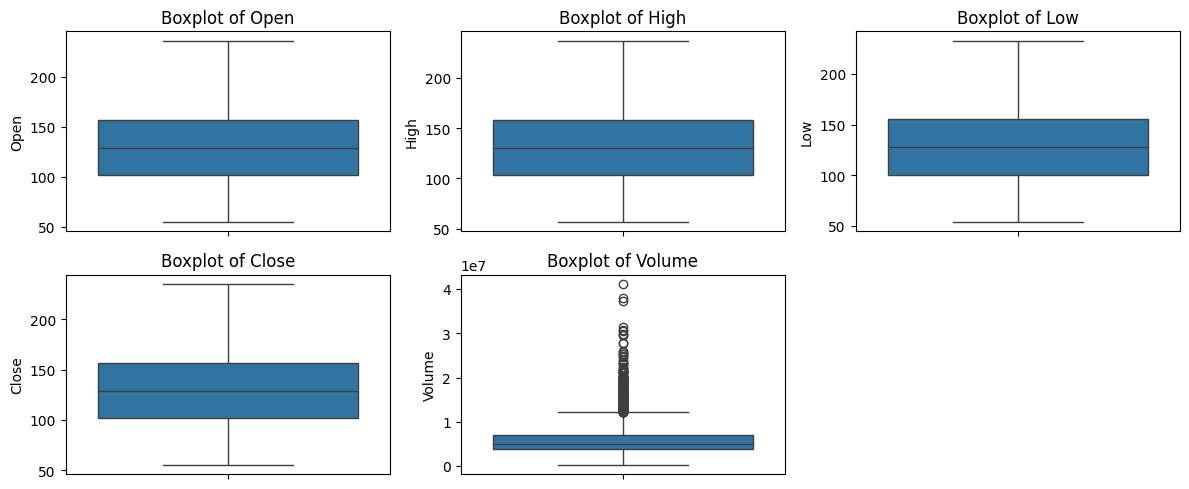

In [13]:
#displaying outliers using boxplots
plt.figure(figsize=(12,5))
for i, column in enumerate(['Open', 'High', 'Low', 'Close', 'Volume'], start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

## Data Preprocessing

### Feature Scaling

In [14]:
# Select numerical columns for scaling
numerical_cols = df.columns[1:]  # Skipping the 'Date' column

In [15]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Displaying the scaled DataFrame
print("\nScaled DataFrame:")
print(df)


Scaled DataFrame:
              Open      High       Low     Close    Volume
2024-11-19  206.50  2.106320  2.064497  2.138297 -0.920079
2024-11-18  207.00  2.054070  2.042035  2.079268 -0.754711
2024-11-15  207.46  2.056116  2.006418  1.994550 -0.578693
2024-11-14  210.00  2.110956  2.068880  2.103863  0.145008
2024-11-13  209.50  2.135788  2.143398  2.156607 -0.802691
...            ...       ...       ...       ...       ...
1999-11-05   92.75 -1.096651 -1.113374 -1.141094  2.378453
1999-11-04   94.44 -1.055724 -1.118579 -1.105294  3.276107
1999-11-03   95.87 -1.014796 -1.022695 -1.028501  1.356916
1999-11-02   96.75 -0.991059 -1.017490 -1.016477  1.580208
1999-11-01   98.50 -0.936489 -0.944070 -0.963460  1.109060

[6304 rows x 5 columns]
